## Preprocessing

In [1]:
#eng
en_text = "After sleeping for four hours, he decided to sleep for another four."

In [2]:
#ru
ru_text = """
Умрёшь — начнёшь опять сначала
И повторится всё, как встарь:
Ночь, ледяная рябь канала,
Аптека, улица, фонарь."""

### Functions

#### tokenizer

In [20]:
def custom_tokenizer(t, locale='en'):
    from nltk.corpus import stopwords
    from autocorrect import Speller
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    text = t.lower()
    
    if locale == 'ru':
        stop_words = set(stopwords.words('russian'))
        spell = Speller(lang='ru')
    elif locale == 'en':
        stop_words = set(stopwords.words('english'))
        spell = Speller(lang='en')
    else:
        stop_words = set(stopwords.words('english'))
        spell = Speller(lang='en')
        
    word_tokens = tokenizer.tokenize(text)
    filtered_sentence = [spell(w) for w in word_tokens if not spell(w) in stop_words and spell(w).strip() not in punctuation]

    print(t)
    print('to')
    print(word_tokens)
    print('to')
    print(filtered_sentence)
    
    return filtered_sentence

In [21]:
custom_tokenizer(ru_text, 'ru')


Умрёшь — начнёшь опять сначала
И повторится всё, как встарь:
Ночь, ледяная рябь канала,
Аптека, улица, фонарь.
to
['умрёшь', '—', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', ',', 'как', 'встарь', ':', 'ночь', ',', 'ледяная', 'рябь', 'канала', ',', 'аптека', ',', 'улица', ',', 'фонарь', '.']
to
['умрёшь', 'начнёшь', 'сначала', 'повторится', 'всё', 'встарь', 'ночь', 'ледяная', 'рябь', 'канала', 'аптека', 'улица', 'фонарь']


['умрёшь',
 'начнёшь',
 'сначала',
 'повторится',
 'всё',
 'встарь',
 'ночь',
 'ледяная',
 'рябь',
 'канала',
 'аптека',
 'улица',
 'фонарь']

In [22]:
custom_tokenizer(en_text, 'en')

After sleeping for four hours, he decided to sleep for another four.
to
['after', 'sleeping', 'for', 'four', 'hours', ',', 'he', 'decided', 'to', 'sleep', 'for', 'another', 'four', '.']
to
['sleeping', 'four', 'hours', 'decided', 'sleep', 'another', 'four']


['sleeping', 'four', 'hours', 'decided', 'sleep', 'another', 'four']

### Punctuantion

In [3]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
punctuation += '—'

In [5]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~—


### Tokenization

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fitts\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fitts\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fitts\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()

In [10]:
en_tokens = tokenizer.tokenize(en_text)
print(en_tokens)

['After', 'sleeping', 'for', 'four', 'hours', ',', 'he', 'decided', 'to', 'sleep', 'for', 'another', 'four', '.']


In [11]:
ru_tokens = tokenizer.tokenize(ru_text)
print(ru_tokens)

['Умрёшь', '—', 'начнёшь', 'опять', 'сначала', 'И', 'повторится', 'всё', ',', 'как', 'встарь', ':', 'Ночь', ',', 'ледяная', 'рябь', 'канала', ',', 'Аптека', ',', 'улица', ',', 'фонарь', '.']


### Autocorrect

In [12]:
from autocorrect import Speller
spell = Speller(lang='en')

In [13]:
print(spell('caaar'))
print(spell(u'mussage'))
print(spell(u'survice'))
print(spell(u'hte'))

car
message
service
the


In [14]:
from autocorrect import Speller
spell = Speller(lang='ru')
print(spell('мышина'))
print(spell(u'сбщение'))
print(spell(u'проктика'))
print(spell(u'каординация'))

машина
общение
практика
координация


### Stemming

In [15]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [23]:
en_stemming_sentence = [ps.stem(w) for w in custom_tokenizer(en_text)]
print('to')
print(en_stemming_sentence)

After sleeping for four hours, he decided to sleep for another four.
to
['after', 'sleeping', 'for', 'four', 'hours', ',', 'he', 'decided', 'to', 'sleep', 'for', 'another', 'four', '.']
to
['sleeping', 'four', 'hours', 'decided', 'sleep', 'another', 'four']
to
['sleep', 'four', 'hour', 'decid', 'sleep', 'anoth', 'four']


In [24]:
ru_stemming_sentence = [ps.stem(w) for w in custom_tokenizer(ru_text)]
print('to')
print(ru_stemming_sentence)


Умрёшь — начнёшь опять сначала
И повторится всё, как встарь:
Ночь, ледяная рябь канала,
Аптека, улица, фонарь.
to
['умрёшь', '—', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', ',', 'как', 'встарь', ':', 'ночь', ',', 'ледяная', 'рябь', 'канала', ',', 'аптека', ',', 'улица', ',', 'фонарь', '.']
to
['умрёшь', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', 'как', 'встарь', 'ночь', 'ледяная', 'рябь', 'канала', 'аптека', 'улица', 'фонарь']
to
['умрёшь', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', 'как', 'встарь', 'ночь', 'ледяная', 'рябь', 'канала', 'аптека', 'улица', 'фонарь']


In [25]:
from nltk.stem.snowball import RussianStemmer
rs = RussianStemmer()

In [26]:
ru_stemming_sentence = [rs.stem(w) for w in custom_tokenizer(ru_text)]
print('to')
print(ru_stemming_sentence)


Умрёшь — начнёшь опять сначала
И повторится всё, как встарь:
Ночь, ледяная рябь канала,
Аптека, улица, фонарь.
to
['умрёшь', '—', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', ',', 'как', 'встарь', ':', 'ночь', ',', 'ледяная', 'рябь', 'канала', ',', 'аптека', ',', 'улица', ',', 'фонарь', '.']
to
['умрёшь', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', 'как', 'встарь', 'ночь', 'ледяная', 'рябь', 'канала', 'аптека', 'улица', 'фонарь']
to
['умреш', 'начнеш', 'опя', 'снача', 'и', 'повтор', 'все', 'как', 'встар', 'ноч', 'ледян', 'ряб', 'кана', 'аптек', 'улиц', 'фонар']


### Lemmatization

In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [28]:
en_lemm_sentence = [lemmatizer.lemmatize(w) for w in custom_tokenizer(en_text)]
print('to')
print(en_lemm_sentence)

After sleeping for four hours, he decided to sleep for another four.
to
['after', 'sleeping', 'for', 'four', 'hours', ',', 'he', 'decided', 'to', 'sleep', 'for', 'another', 'four', '.']
to
['sleeping', 'four', 'hours', 'decided', 'sleep', 'another', 'four']
to
['sleeping', 'four', 'hour', 'decided', 'sleep', 'another', 'four']


In [29]:
ru_lemm_sentence = [lemmatizer.lemmatize(w) for w in custom_tokenizer(ru_text)]
print('to')
print(ru_lemm_sentence)


Умрёшь — начнёшь опять сначала
И повторится всё, как встарь:
Ночь, ледяная рябь канала,
Аптека, улица, фонарь.
to
['умрёшь', '—', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', ',', 'как', 'встарь', ':', 'ночь', ',', 'ледяная', 'рябь', 'канала', ',', 'аптека', ',', 'улица', ',', 'фонарь', '.']
to
['умрёшь', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', 'как', 'встарь', 'ночь', 'ледяная', 'рябь', 'канала', 'аптека', 'улица', 'фонарь']
to
['умрёшь', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', 'как', 'встарь', 'ночь', 'ледяная', 'рябь', 'канала', 'аптека', 'улица', 'фонарь']


[pymystem](https://github.com/nlpub/pymystem3)

In [30]:
# var 1
from pymystem3 import Mystem
m = Mystem() # lemmatize, analyse

In [31]:
print(m.lemmatize('Стоять'))

['стоять', '\n']


In [32]:
ru_lemm_sentence = [m.lemmatize(w)[0] for w in custom_tokenizer(ru_text)]
print('to')
print(ru_lemm_sentence)


Умрёшь — начнёшь опять сначала
И повторится всё, как встарь:
Ночь, ледяная рябь канала,
Аптека, улица, фонарь.
to
['умрёшь', '—', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', ',', 'как', 'встарь', ':', 'ночь', ',', 'ледяная', 'рябь', 'канала', ',', 'аптека', ',', 'улица', ',', 'фонарь', '.']
to
['умрёшь', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', 'как', 'встарь', 'ночь', 'ледяная', 'рябь', 'канала', 'аптека', 'улица', 'фонарь']
to
['умирать', 'начинать', 'опять', 'сначала', 'и', 'повторяться', 'все', 'как', 'встарь', 'ночь', 'ледяной', 'рябь', 'канал', 'аптека', 'улица', 'фонарь']


[pymorphy](https://pymorphy2.readthedocs.io/en/stable/)

In [33]:
#var 2
import pymorphy2

In [34]:
morph = pymorphy2.MorphAnalyzer(lang='ru')

In [35]:
ru_lemm_sentence2 = [morph.parse(w)[0].normal_form for w in custom_tokenizer(ru_text)]
print('to')
print(ru_lemm_sentence2)


Умрёшь — начнёшь опять сначала
И повторится всё, как встарь:
Ночь, ледяная рябь канала,
Аптека, улица, фонарь.
to
['умрёшь', '—', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', ',', 'как', 'встарь', ':', 'ночь', ',', 'ледяная', 'рябь', 'канала', ',', 'аптека', ',', 'улица', ',', 'фонарь', '.']
to
['умрёшь', 'начнёшь', 'опять', 'сначала', 'и', 'повторится', 'всё', 'как', 'встарь', 'ночь', 'ледяная', 'рябь', 'канала', 'аптека', 'улица', 'фонарь']
to
['умереть', 'начать', 'опять', 'сначала', 'и', 'повториться', 'всё', 'как', 'встарь', 'ночь', 'ледяной', 'рябь', 'канал', 'аптека', 'улица', 'фонарь']


## Word Embedding

### Comparison of Feature Extraction Techniques

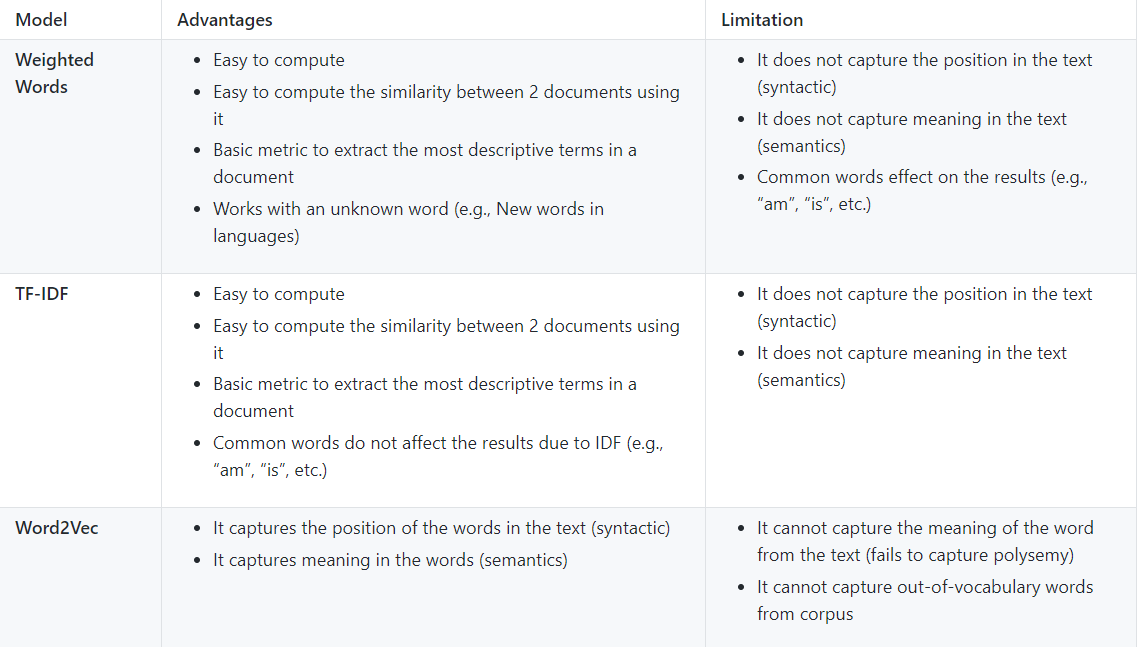

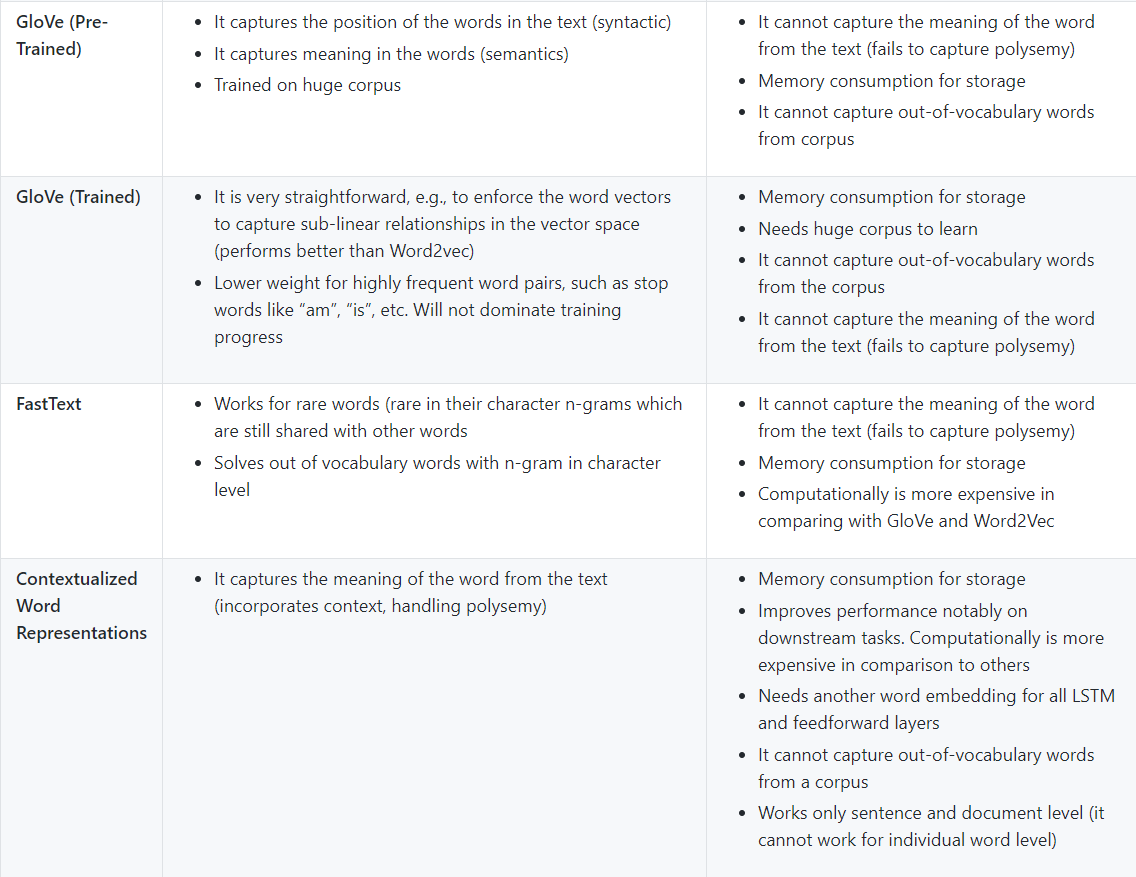

#### TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
def loadData(X_train, X_test,MAX_NB_WORDS=7500):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    print("tf-idf with",str(np.array(X_train).shape[1]),"features")
    return (X_train,X_test)

## Dimensionality Reduction

In [37]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

X_train,X_test = loadData(X_train,X_test)

tf-idf with 7500 features


### Principal Component Analysis (PCA)

Метод главных компонент (PCA) - самый популярный метод многомерного анализа и уменьшения размерности. 
PCA - это метод определения подпространства, в котором приблизительно находятся данные. Это означает поиск новых некоррелированных переменных и максимальное увеличение дисперсии, чтобы сохранить как можно большую вариативность.

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2000)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

print("train with old features: ",np.array(X_train).shape)
print("train with new features:" ,np.array(X_train_new).shape)

print("test with old features: ",np.array(X_test).shape)
print("test with new features:" ,np.array(X_test_new).shape)

train with old features:  (11314, 7500)
train with new features: (11314, 2000)
test with old features:  (7532, 7500)
test with new features: (7532, 2000)


### Non-negative Matrix Factorization (NMF)

Неотрицательное матричное разложение (NMF) -  это представление матрицы V в виде произведения матриц W и H, в котором все элементы трех матриц неотрицательны. Это разложение используется в различных областях знаний, например, в биологии, компьютерном зрении, рекомендательных системах.

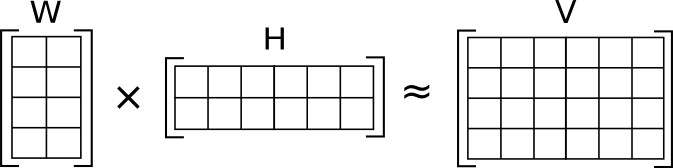

In [ ]:
from sklearn.decomposition import NMF

NMF_ = NMF(n_components=2000)
X_train_new = NMF_.fit(X_train)
X_train_new =  NMF_.transform(X_train)
X_test_new = NMF_.transform(X_test)

print("train with old features: ",np.array(X_train).shape)
print("train with new features:" ,np.array(X_train_new).shape)

print("test with old features: ",np.array(X_test).shape)
print("test with new features:" ,np.array(X_test_new))

### Autoencoder

Autoencoder - нейронная сеть, которая обучена пытаться сопоставить свой ввод с выводом. 
Autoencoder как метод уменьшения размерности добился большого успеха благодаря силе предсказания нейронных сетей. 
Основная идея состоит в том, что можно использовать один скрытый слой между входным и выходным слоями с меньшим количеством нейронов для уменьшения размерности пространства признаков. Специально для текстов, документов и последовательностей, содержащих множество функций, autoencoder может помочь обрабатывать данные быстрее и эффективнее.

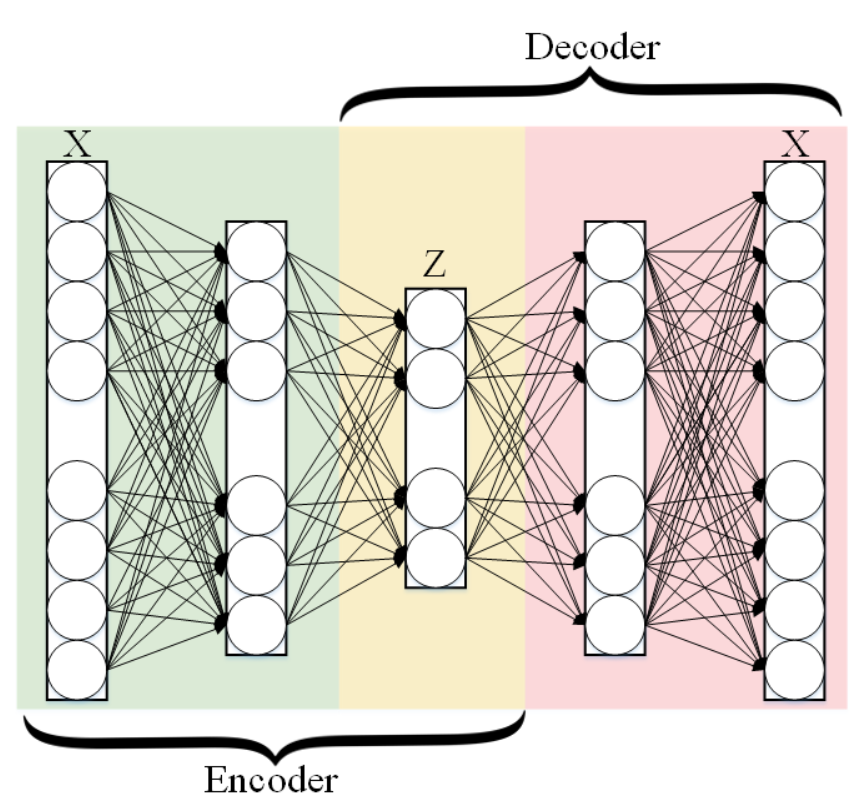

In [39]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 1500

# this is our input placeholder
input = Input(shape=(n,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(n, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input, decoded)

# this model maps an input to its encoded representation
encoder = Model(input, encoded)


encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

ModuleNotFoundError: No module named 'keras'

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Text Classification Algorithms

## Comparison Text Classification Algorithms

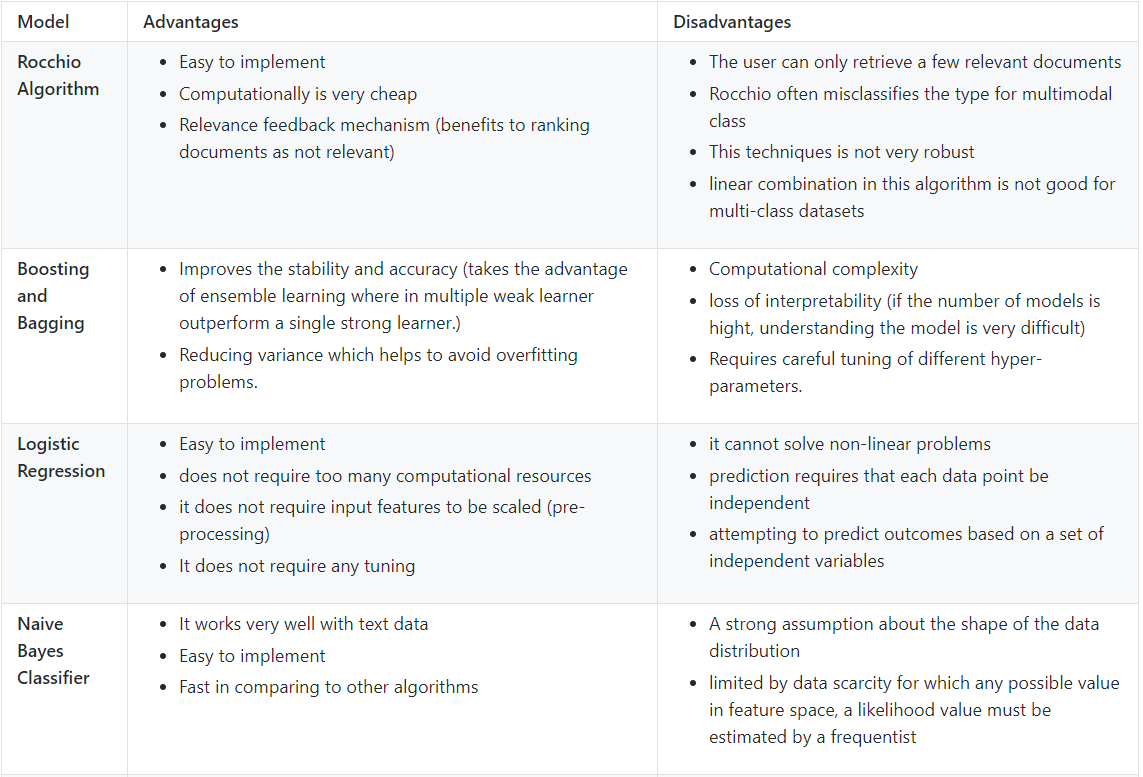

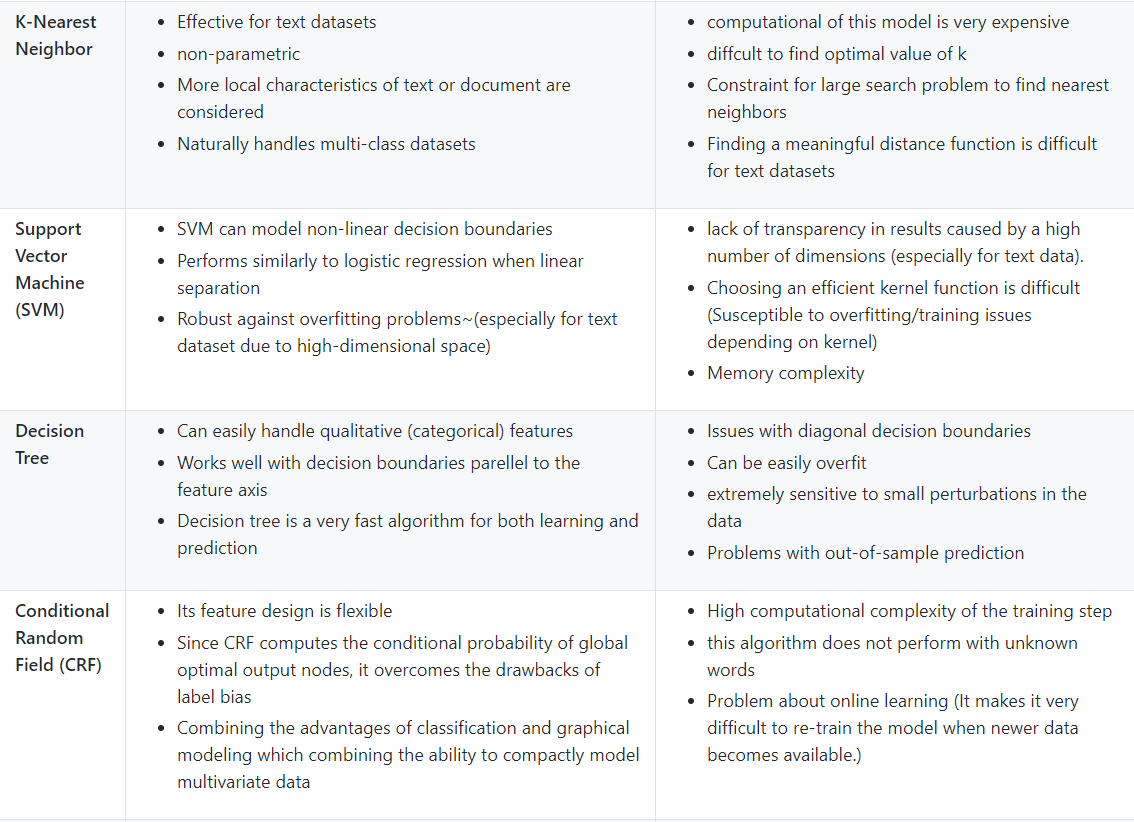

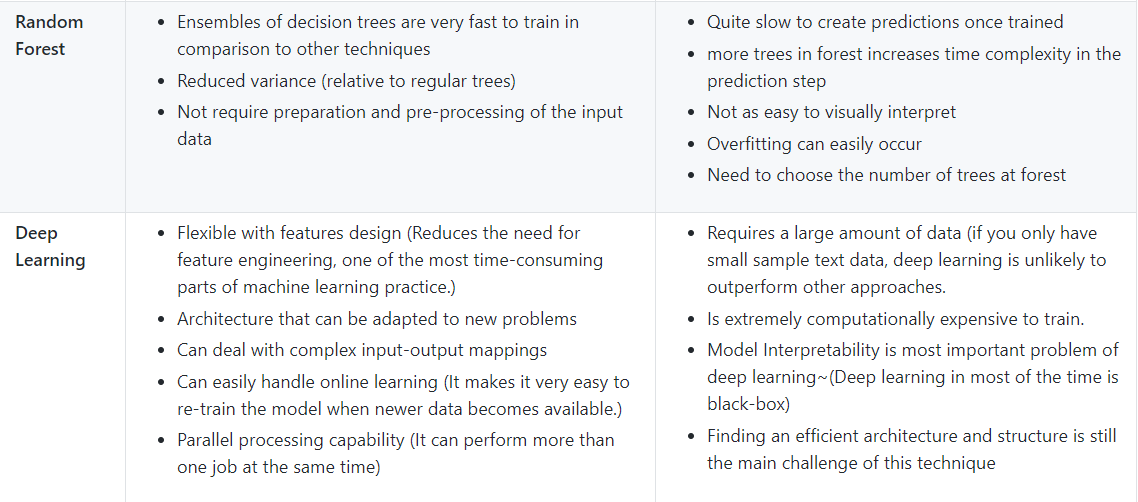

### Boosting

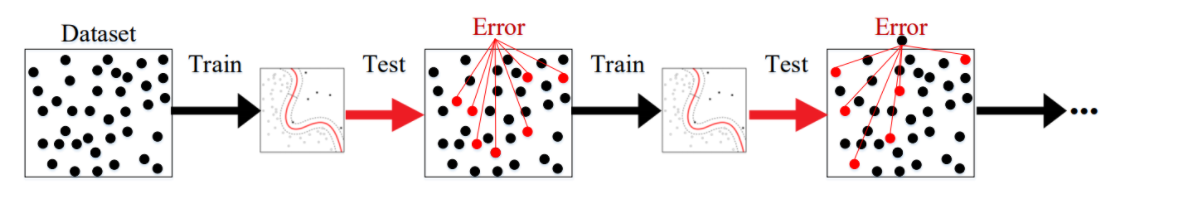

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=100)),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

### Bagging

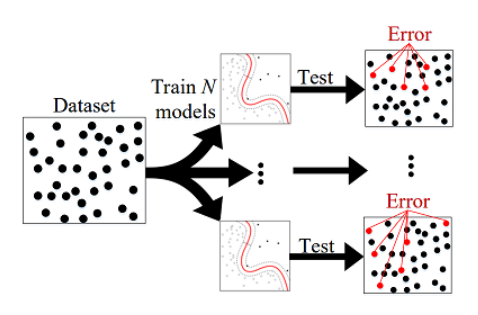

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BaggingClassifier(KNeighborsClassifier())),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

### Naive Bayes Classifier

https://habr.com/ru/post/415963/

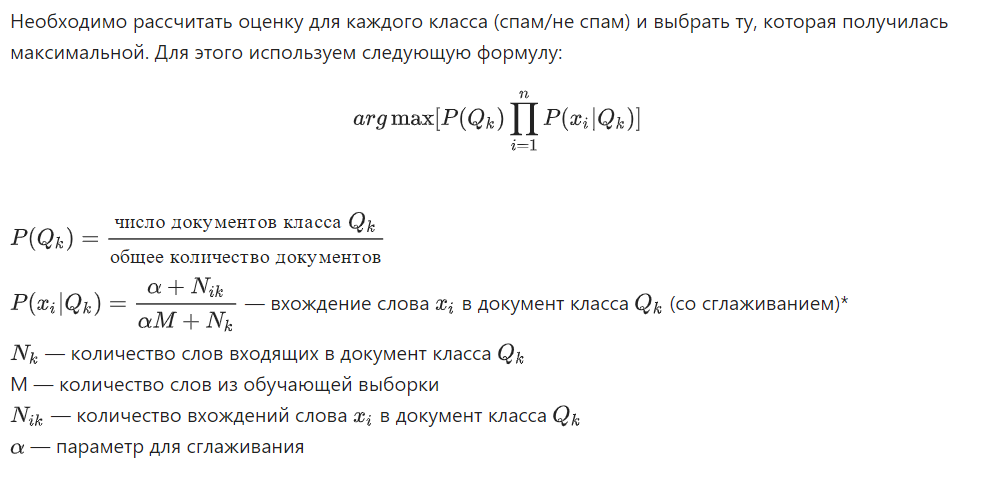

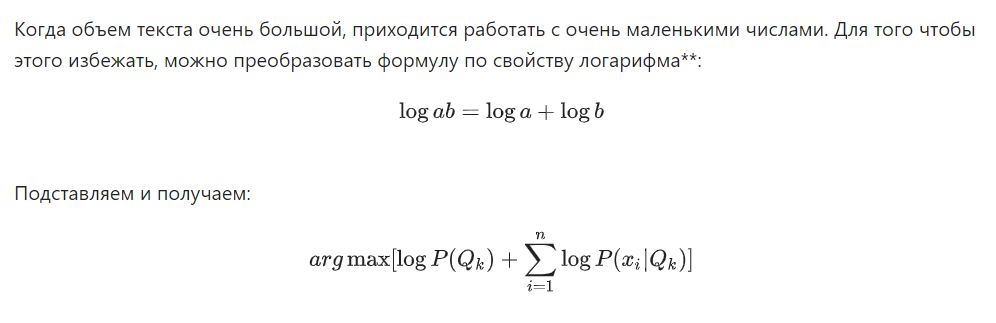

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

### K-nearest Neighbor

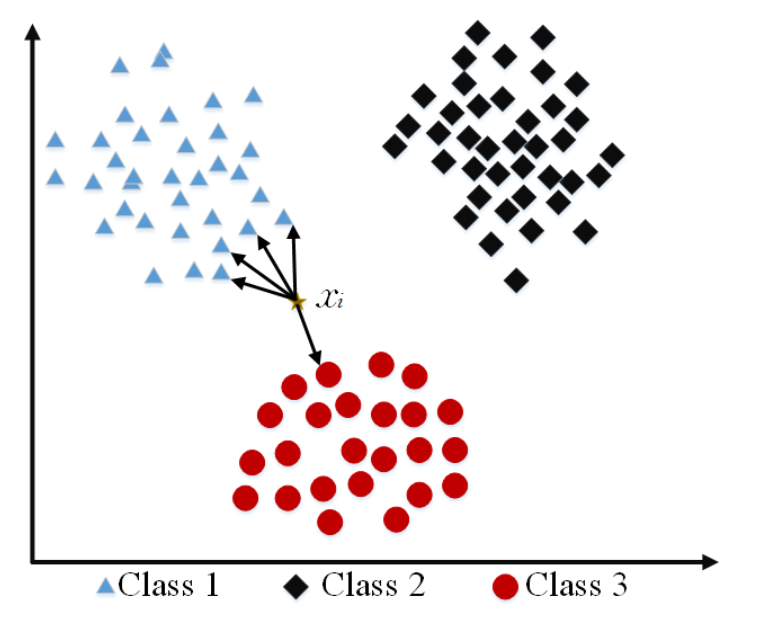

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier()),
                     ])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

### Support Vector Machine (SVM)

https://habr.com/ru/company/ods/blog/484148/

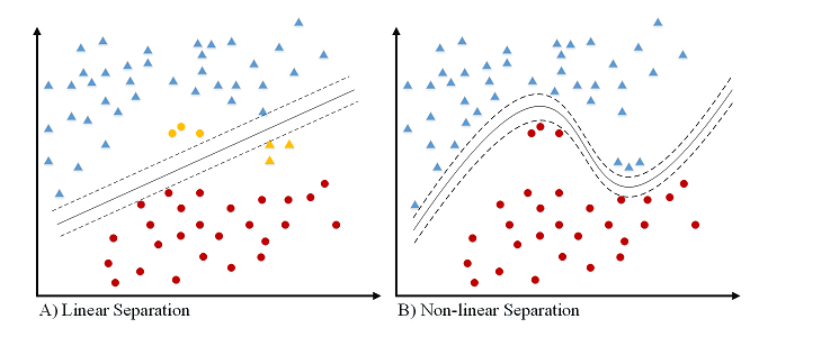

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

### Decision Tree

Просто - https://habr.com/ru/company/productstar/blog/523044/

Чуть сложнее - https://habr.com/ru/company/ods/blog/322534/

In [ ]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', tree.DecisionTreeClassifier()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

### Random Forest

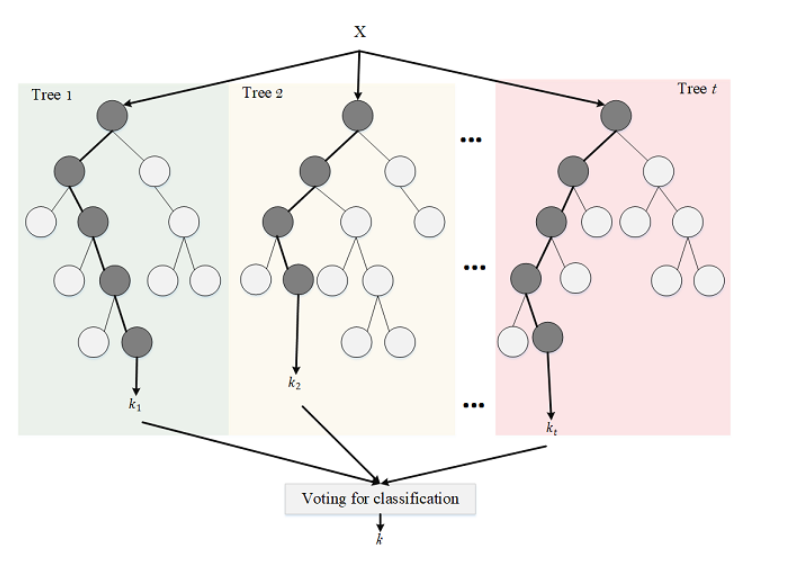

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100)),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

### Recurrent Neural Networks (RNN)

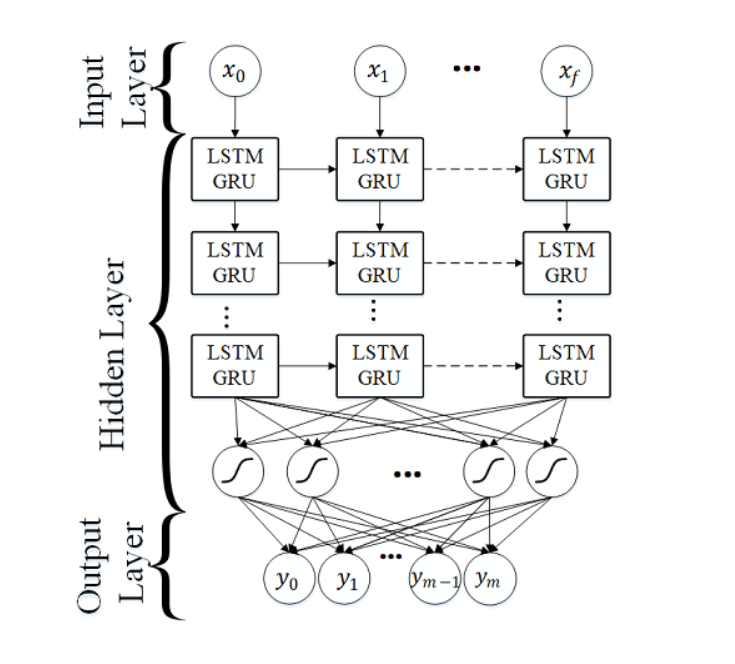